In [29]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [30]:
# Loading the Iris dataset

X, y = load_iris(return_X_y=True, as_frame=True)

In [31]:
# Selecting two features and converting X,y to arrays

X = X[['petal length (cm)', 'petal width (cm)']].to_numpy()
y = y.to_numpy()

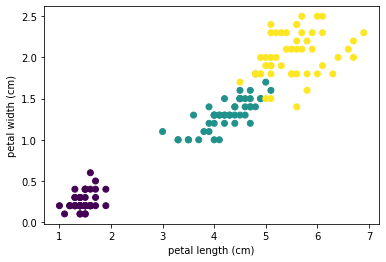

In [41]:
# Plotting

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [ ]:
# Plotar classes separadas

In [119]:
def knn(X_new, X, y, k=5):
    M = X.shape[0]
    distances = np.zeros(M)

    for i in range(M):
        distances[i] = np.linalg.norm((X_new - X[i]))

    sorted_indexes = np.argsort(distances)
    sorted_distances = np.sort(distances)

    k_indexes = sorted_indexes[:k]
    k_labels = y[k_indexes]

    label, count = np.unique(k_labels, return_counts=True)
    y_pred = label[count.argmax()]
    
    return y_pred

In [120]:
# Modificar para permitir a previsão de mais de uma instância ao mesmo tempo
# Usar OOP herdando do sklearn

In [122]:
X_new = np.array([6.5, 1.75])

knn(X_new, X, y, k=5)

2

In [ ]:
# Comparar com implementação do sklearn